## DDoS Attack Classification using ML and DL

Dataset: http://dx.doi.org/10.17632/mfnn9bh42m.1#file-ba7d3a46-1dc3-452e-aeac-26d909389b29

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
udp=pd.read_csv('./data/BOUN_UDP_Anon.csv')

In [3]:
udp.head()

,Time,Frame Number,Frame_length,Source_ip,Destination_IP,Source_Port,Destination_Port,SYN,ACK,RST,TTL,TCP_Protocol
0,0.000000,1,68,92.45.54.178,10.50.209.134,NaN,NaN,NaN,NaN,NaN,116,UDP
1,0.000218,2,900,10.50.197.6,31.13.84.8,49218.0,443.0,Not set,Set,Not set,127,TCP
2,0.000233,3,171,31.13.84.8,192.168.66.111,443.0,40991.0,Not set,Set,Not set,"252,87",TCP
3,0.000235,4,1500,192.168.68.148,54.225.245.82,54602.0,443.0,Not set,Set,Not set,"63,64",TCP
4,0.000466,5,126,192.168.79.128,64.15.113.173,55251.0,443.0,Not set,Set,Not set,"63,64",TCP


In [4]:
attack1=udp[(udp['Time']>80.87054)&(udp['Time']<102.68198)]
attack2=udp[(udp['Time']>180.94241)&(udp['Time']<203.55186)]
attack3=udp[(udp['Time']>280.59444)&(udp['Time']<303.16265)]
attack4=udp[(udp['Time']>381.01394)&(udp['Time']<403.65057)]

In [5]:
udp_attacks=pd.concat([attack1,attack2,attack3,attack4])

In [6]:
udp_attacks['Type']="UDP_ATTACK"

In [7]:
udp_attacks

,Time,Frame Number,Frame_length,Source_ip,Destination_IP,Source_Port,Destination_Port,SYN,ACK,RST,TTL,TCP_Protocol,Type
1048852,80.870710,1048853,1396,10.50.197.71,216.58.208.111,NaN,NaN,NaN,NaN,NaN,127,UDP,UDP_ATTACK
1048853,80.870712,1048854,1500,64.15.113.144,192.168.71.186,80.0,37096.0,Not set,Set,Not set,"252,57",TCP,UDP_ATTACK
1048854,80.870713,1048855,1500,64.15.113.144,192.168.71.186,80.0,37096.0,Not set,Set,Not set,"252,57",TCP,UDP_ATTACK
1048855,80.870715,1048856,1500,64.15.113.143,192.168.76.227,443.0,50514.0,Not set,Set,Not set,"252,57",TCP,UDP_ATTACK
1048856,80.870716,1048857,1500,64.15.113.143,192.168.76.227,443.0,50514.0,Not set,Set,Not set,"252,57",TCP,UDP_ATTACK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6513618,403.650564,6513619,1396,10.50.197.71,216.58.208.111,NaN,NaN,NaN,NaN,NaN,127,UDP,UDP_ATTACK
6513619,403.650565,6513620,626,192.168.68.148,54.225.245.82,54602.0,443.0,Not set,Set,Not set,"63,64",TCP,UDP_ATTACK
6513620,403.650566,6513621,1396,10.50.197.71,216.58.208.111,NaN,NaN,NaN,NaN,NaN,127,UDP,UDP_ATTACK
6513621,403.650567,6513622,1396,10.50.197.71,216.58.208.111,NaN,NaN,NaN,NaN,NaN,127,UDP,UDP_ATTACK


In [8]:
udp_benign=udp[(udp['Time']<70)]

In [9]:
udp_benign['Type']="BENIGN"

c:\users\ashwin\miniconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [10]:
udp_benign

,Time,Frame Number,Frame_length,Source_ip,Destination_IP,Source_Port,Destination_Port,SYN,ACK,RST,TTL,TCP_Protocol,Type
0,0.000000,1,68,92.45.54.178,10.50.209.134,NaN,NaN,NaN,NaN,NaN,116,UDP,BENIGN
1,0.000218,2,900,10.50.197.6,31.13.84.8,49218.0,443.0,Not set,Set,Not set,127,TCP,BENIGN
2,0.000233,3,171,31.13.84.8,192.168.66.111,443.0,40991.0,Not set,Set,Not set,"252,87",TCP,BENIGN
3,0.000235,4,1500,192.168.68.148,54.225.245.82,54602.0,443.0,Not set,Set,Not set,"63,64",TCP,BENIGN
4,0.000466,5,126,192.168.79.128,64.15.113.173,55251.0,443.0,Not set,Set,Not set,"63,64",TCP,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
894386,69.999327,894387,91,79.123.178.90,74.125.11.166,NaN,NaN,NaN,NaN,NaN,127,UDP,BENIGN
894387,69.999353,894388,126,192.168.76.223,104.244.43.7,65038.0,443.0,Not set,Set,Not set,"63,64",TCP,BENIGN
894388,69.999464,894389,91,79.123.178.90,74.125.11.166,NaN,NaN,NaN,NaN,NaN,127,UDP,BENIGN
894389,69.999583,894390,126,192.168.64.10,46.20.153.2,41910.0,80.0,Not set,Set,Not set,"63,64",TCP,BENIGN


In [11]:
UDP_Flood_Data=pd.concat([udp_attacks,udp_benign])

In [12]:
UDP_Flood_Data.shape

(2558732, 13)

In [13]:
tcp=pd.read_csv('./data/BOUN_TCP_Anon.csv')

In [14]:
attack1=tcp[(tcp['Time']>80.22269)&(tcp['Time']<102.20233)]
attack2=tcp[(tcp['Time']>180.17426)&(tcp['Time']<203.08441)]
attack3=tcp[(tcp['Time']>279.97402)&(tcp['Time']<301.79111)]
attack4=tcp[(tcp['Time']>380.10981)&(tcp['Time']<402.35755)]

In [15]:
tcp_attacks=pd.concat([attack1,attack2,attack3,attack4])
tcp_attacks['Type']="TCP_ATTACK"

In [16]:
tcp_benign=tcp[tcp['Time']>420]

In [17]:
tcp_benign['Type']="BENIGN"

c:\users\ashwin\miniconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [18]:
tcp_benign

,Time,Frame Number,Frame_length,Source_ip,Destination_IP,Source_Port,Destination_Port,SYN,ACK,RST,TTL,TCP_Protocol,Type
8189675,420.000001,8189676,64,106.80.156.191,10.50.197.148,1686.0,1143.0,Not set,Set,Not set,42,TCP,BENIGN
8189676,420.000145,8189677,282,192.168.4.213,31.13.84.52,52874.0,443.0,Not set,Set,Not set,63,TCP,BENIGN
8189677,420.000322,8189678,81,216.58.208.101,10.50.211.204,NaN,NaN,NaN,NaN,NaN,54,UDP,BENIGN
8189678,420.000323,8189679,1518,10.50.211.244,31.216.144.39,59885.0,80.0,Not set,Set,Not set,127,TCP,BENIGN
8189679,420.000476,8189680,2978,10.50.211.244,31.216.144.39,59885.0,80.0,Not set,Set,Not set,127,TCP,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9335600,482.662762,9335601,1396,10.50.197.71,216.58.208.111,NaN,NaN,NaN,NaN,NaN,127,UDP,BENIGN
9335601,482.662764,9335602,1396,10.50.197.71,216.58.208.111,NaN,NaN,NaN,NaN,NaN,127,UDP,BENIGN
9335602,482.662912,9335603,1396,10.50.197.71,216.58.208.111,NaN,NaN,NaN,NaN,NaN,127,UDP,BENIGN
9335603,482.662913,9335604,1396,10.50.197.71,216.58.208.111,NaN,NaN,NaN,NaN,NaN,127,UDP,BENIGN


In [19]:
TCP_SYN_Data=pd.concat([tcp_attacks,tcp_benign])

c:\users\ashwin\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

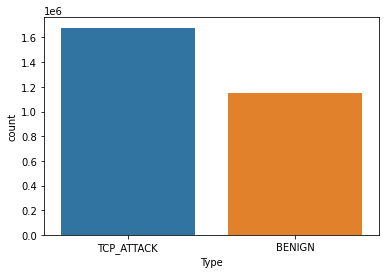

In [20]:
sns.countplot(TCP_SYN_Data['Type'])

c:\users\ashwin\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

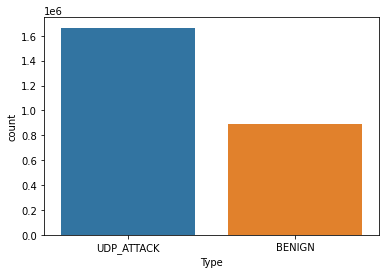

In [21]:
sns.countplot(UDP_Flood_Data['Type'])

In [22]:
TCP_SYN_Data.to_csv('./data/TCP_SYN_DATA.csv')
UDP_Flood_Data.to_csv('./data/UDP_FLOOD_DATA.csv')

In [23]:
final_df=pd.concat([TCP_SYN_Data,UDP_Flood_Data])

c:\users\ashwin\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

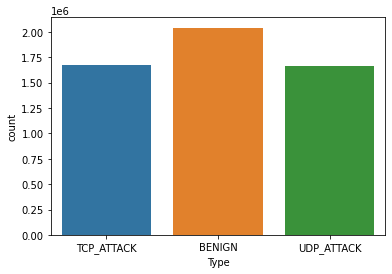

In [24]:
sns.countplot(final_df['Type'])

In [25]:
final_df.to_csv('./data/DDoS_Attack_Dataset.csv')